## Data-cleaning notebook for Guided Capstone 2--Tom Keating

## 1. Loading data and importing modules

In [85]:
#I like this Markdown mode feature! Didn't know that trick until now.

#importing modules--may add to this later
import pandas as pd
import matplotlib.pyplot as plt
#getting error and need to install 1.3.6 grrr, ok, many cups of coffee later...

In [86]:
#df=pd.read_csv('//Users/Owner/OneDrive/Downloads/manufacturing_defect_dataset.csv')

In [62]:
#--that didn't work, nor did what I typed below:

In [63]:
import os                  #many workarounds later...
current_path = os.getcwd()

In [64]:
print(current_path)   #unless I put the file there, nothing I do
#is able to FORCE Jupyter to go looking in the directory where the file actually is

C:\Users\Owner


In [65]:
df=pd.read_csv('manufacturing_defect_dataset.csv')  #and now it works

In [66]:
df. head()  #well...here we go:  

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


## 2. Inspecting the dataset

In [67]:
df.shape  #ok, that's in line with what Kaggle said

(3240, 17)

In [68]:
df.info()  #amazingly, the data has no NaNs or other missing data, and does not have any unexpected data types
#Kaggle did rate this dataset as a '10' for useability, perhaps that's why

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [69]:
#A few comments after looking this over more carefully.  'Additive mfg' refers to 3D printing,
#so all of these parts have 3D printing going on to some extent (no zero values)
#'Defect status' is a prediction from the authors (not a measured quantity). 
#let's see what they found
a=df['DefectStatus'].sum()
print(a)

2723


In [70]:
#very surprising.  Defects are supposed to be 'rare' but are 2722/3240=84% predicted in this dataset...
#seems odd.  More digging required!
#in the meantime, I have set up the GitHub for this project and loaded the dataset and .ipynb file

## 3.Data Definitions and checking for clean data: unique values, outliers, etc

In [71]:
#  Want to dig in and understand all these columns. let's try this:
df.describe()  #this is helpful.  Want to check the integer-valued columns first; the summary stats are good for the floats

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [72]:
#curious about unique values for some of the integer columns.
arr1 = df['SafetyIncidents'].unique()
arr2 = df['DeliveryDelay'].unique()  
# printing arrays
print('Safety: ',arr1, 'Delays: ',arr2) 

 #ok, so all int values between min and max are present here.  MaintenanceHours might later be lumped into low, med, high;

Safety:  [0 7 2 8 3 4 6 1 5 9] Delays:  [1 4 0 5 3 2]


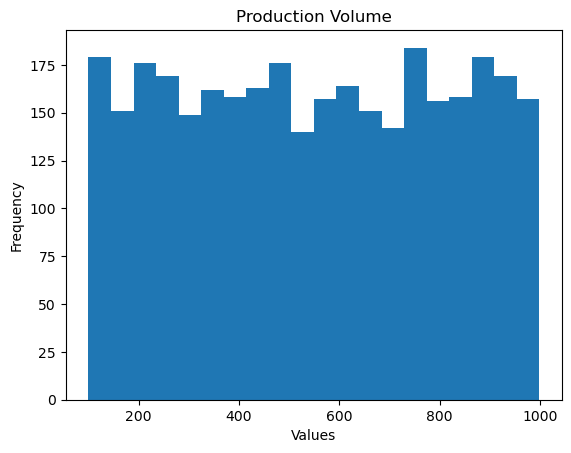

In [73]:
#needless to say, later on some columns may need normalizing, while some of the integer ones might be categories
#let's make separate lists of variables by type, might be handy later:
f_list = ['ProductionCost', 'SupplierQuality', 'DefectRate', 'QualityScore', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents','EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']
int_list = ['ProductionVolume', 'DeliveryDelay', 'MaintenanceHours', 'SafetyIncidents'] #not including defectstatus--maybe rename this
#note: production volume is integer-valued but could be converted to float or binned to make categories (e.g., 'large', 'medium', 'small'.
#let's look at a histogram or two
plt.hist(df['ProductionVolume'], bins=20)
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Production Volume')
plt.show()   #well, so this doesn't show much of a pattern...

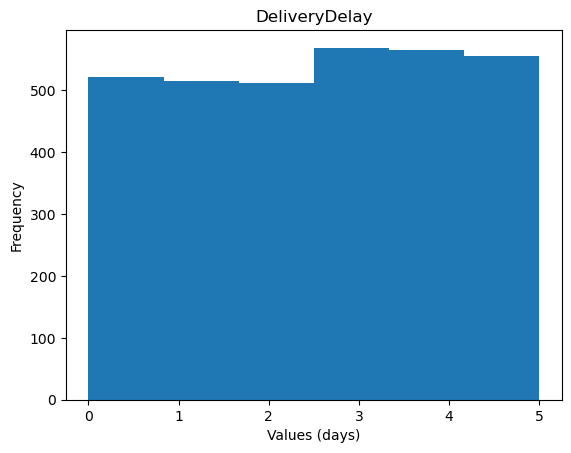

In [74]:
#Let's take a look at the other integer-valued columns.
plt.hist(df['DeliveryDelay'], bins=6)
plt.xlabel('Values (days)')
plt.ylabel('Frequency')
plt.title('DeliveryDelay')
plt.show()   #So:  delays are a big deal! I'm surprised the plot is so flat...

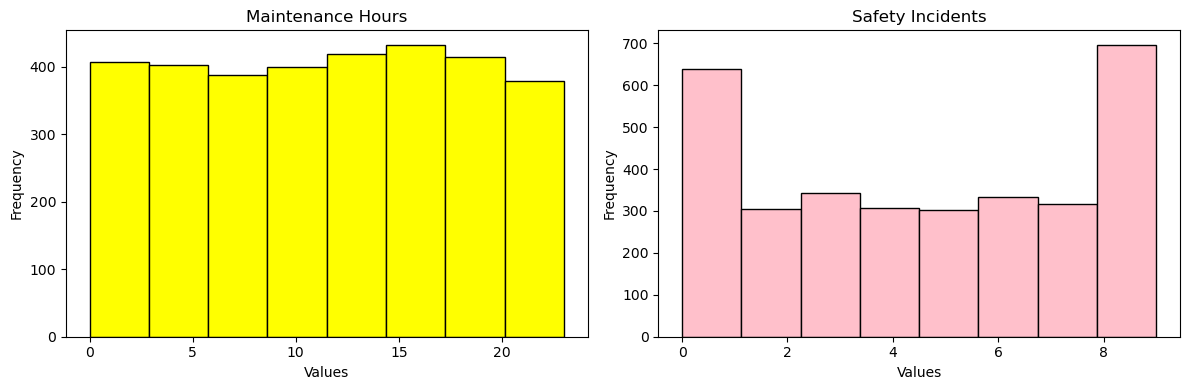

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
 
axes[0].hist(df['MaintenanceHours'], bins=8, color='Yellow', edgecolor='black')
axes[0].set_title('Maintenance Hours')
 
axes[1].hist(df['SafetyIncidents'], bins=8, color='Pink', edgecolor='black')
axes[1].set_title('Safety Incidents')
 
# Adding labels and title
for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figures
plt.show()

In [76]:
#well, so there's a lot of low and high maintenance, less in-between; roughly the same trend for safety incidents.

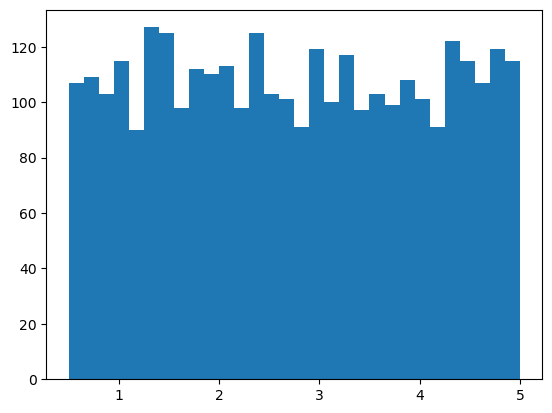

In [77]:
#Very interested in 'Defect Rate'; actual rate per thousand--I am getting the feeling there's not a lot of signal
#but lots of noise...
plt.hist(df['DefectRate'], bins=30)
plt.show()

In [78]:
#let's take a look at the boxplots for float variables and see if we have outliers.
import seaborn as sns


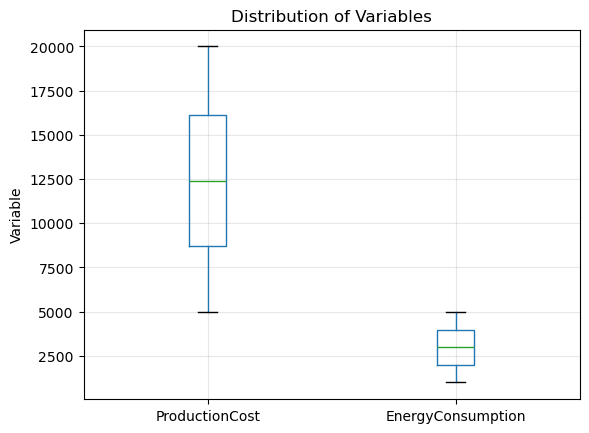

In [79]:
data_to_plot = df[['ProductionCost','EnergyConsumption']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #made the list of float variable columns above

#ok, so there aren't any really big outliers with these, but the numerical range is big.  

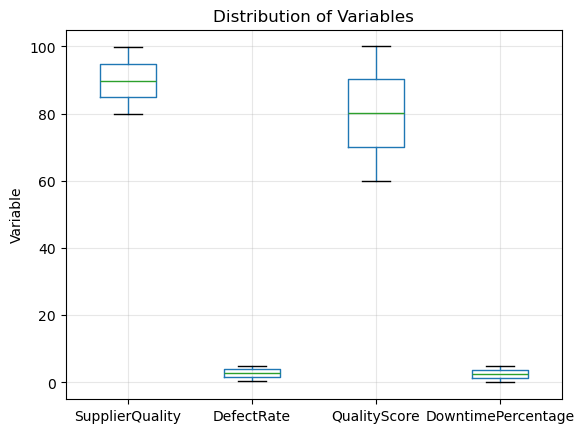

In [80]:
data_to_plot = df[['SupplierQuality', 'DefectRate', 'QualityScore', 'DowntimePercentage']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #I am doing these a few at a time for comparison's sake

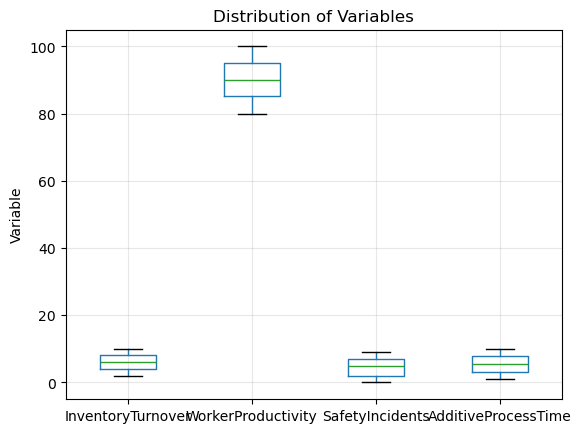

In [81]:
data_to_plot = df[['InventoryTurnover', 'WorkerProductivity', 'SafetyIncidents','AdditiveProcessTime']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #I am doing these a few at a time for comparison's sake

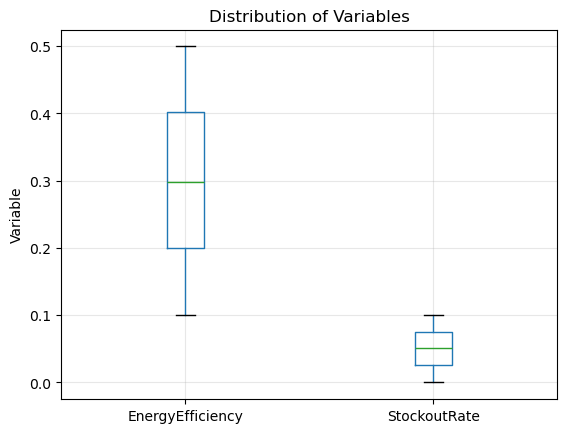

In [82]:
data_to_plot = df[['EnergyEfficiency', 'StockoutRate']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #Energy Efficiency seems mostly low, huh.  Stockout rates are low, too.

## 4. Wrap-up and conclusions

In [83]:
#I don't see any other data cleaning issues at this point; I may decide later not to use
#the 'defect status' column at all (no idea how they derived it) and instead investigate predicting defect
#rates above some threshold.  Next for EDA and beyond, may want to bin some data/create dummies and
#dig into what column features tell us about defect rates.